In [1]:
import tensorflow as tf

In [4]:
import ktransit
import matplotlib.pyplot as plt
import numpy as np

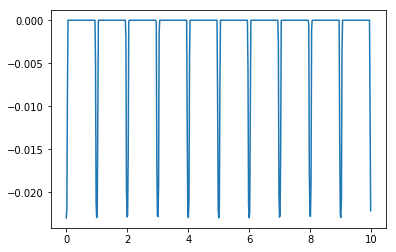

In [7]:
M = ktransit.LCModel()
M.add_star(
        rho=1.5, # mean stellar density in cgs units
        ld1=0.2, # ld1--4 are limb darkening coefficients 
        ld2=0.4, # if only ld1 and ld2 are non-zero then a quadratic limb darkening law is used
        ld3=0.0, # if all four parameters are non-zero we use non-linear flavour limb darkening
        ld4=0.0, 
        dil=0.0, # a dilution factor: 0.0 -> transit not diluted, 0.5 -> transit 50% diluted
        zpt=0.0  # a photometric zeropoint, incase the normalisation was wonky
        )
M.add_planet(
        T0=1.0,     # a transit mid-time  
        period=1.0, # an orbital period in days
        impact=0.1, # an impact parameter
        rprs=0.1,   # planet stellar radius ratio  
        ecosw=0.0,  # eccentricity vector
        esinw=0.0,
        occ=0.0)    # a secondary eclipse depth in ppm

M.add_planet() # you can add as many planets as you like (up to 10)

M.add_data(
        time=np.arange(0,10,0.0188),                                 # timestamps to evaluate the model on
        itime=np.zeros_like(np.arange(0,10,0.0188))+0.0188 )      # integration time of each timestamp

tmod = M.transitmodel # the out of transit data will be 0.0 unless you specify zpt
plt.plot(M.time,tmod)

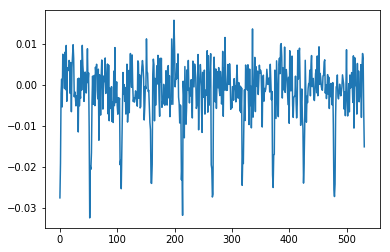

In [21]:
plt.plot(tmod + np.random.normal(scale=0.005, size=np.shape(tmod)[0]))

In [23]:
X = tf.placeholder("float64")
Y = tf.placeholder("float64")

In [24]:
T0 = tf.Variable(tf.ones(1, dtype=tf.float64))
period = tf.Variable(tf.ones(1, dtype=tf.float64))
rprs = tf.Variable(tf.ones(1, dtype=tf.float64))

M = ktransit.LCModel()
M.add_star(
        rho=1.5, # mean stellar density in cgs units
        ld1=0.2, # ld1--4 are limb darkening coefficients 
        ld2=0.4, # if only ld1 and ld2 are non-zero then a quadratic limb darkening law is used
        ld3=0.0, # if all four parameters are non-zero we use non-linear flavour limb darkening
        ld4=0.0, 
        dil=0.0, # a dilution factor: 0.0 -> transit not diluted, 0.5 -> transit 50% diluted
        zpt=0.0  # a photometric zeropoint, incase the normalisation was wonky
        )
M.add_planet(
        T0=T0,     # a transit mid-time  
        period=period, # an orbital period in days
        impact=0.1, # an impact parameter
        rprs=rprs,   # planet stellar radius ratio  
        ecosw=0.0,  # eccentricity vector
        esinw=0.0,
        occ=0.0)    # a secondary eclipse depth in ppm

M.add_planet() # you can add as many planets as you like (up to 10)

M.add_data(
        time=np.arange(0,10,0.0188),                                 # timestamps to evaluate the model on
        itime=np.zeros_like(np.arange(0,10,0.0188))+0.0188 )      # integration time of each timestamp

tmod = M.transitmodel # the out of transit data will be 0.0 unless you specify zpt

model = tmod

ValueError: setting an array element with a sequence.